<h3><b>Northstar metrics and dimensions</b></h3>

---



We want to analyze the following metrics of interest:

  - <b>Average rating</b>: gives a birds' eye view of how our users perceive the movies we rolled out on the platform
  - **Total count of ratings**: measures the engagement level and could also be a proxy for the website traffic
  - **Average rate counts per user** (total count of ratings / number of unique users): also shows the engagement level but normalized to be comparable across dimensions
  - **Diversity of opinion** (rating variance): provides a way to measure how consistent or diverging our users' taste or preference is on our movie selections. Depending on the business goals, we might want to use this in crafting our products in order to maintain a balance between consistency and diversity for our user pool.

The dimensions are:

  - **Genres**: 17 categories in total
  - **Age**: 7 age groups
  - **Occupation**: 21 occupations
  - **Gender**: female and male
  - **Location**: 50 US states

<h3><b>Summary of Insights</b></h3>

---

Engagement per user was highest in 2000 then dropped exponentially to less than half in 2001, a trend that continued for the remaining years and applies across all dimensions of analysis. In overall, average ratings for all years stayed in the good range 3.4 to 3.6. Again, it seems that the reception was mot favorable in 2000 despite coming from a bigger audience compared to the subsequent years. The notable albeit minimal reversal of trend in 2003 could reflect two factors: better-quality movies coming out in the previous year or the changing taste of our users.

**Genres**: the best-performing genre in terms of rating is film-noir and the worst is horror. (how many ratings does a movie receive on average?) = total rate counts/number of movies by genre

**Age**: for all four years, the most actively rating group in terms of the number of unique users and also demanding group is young adults aged 25-34 who consistently outnumbered the following groups of 50-55 and older by a large margin. On the other hand, despite rating less actively, the 18-24 and 35-49 groups were simultaneously easier to please with a consistent rating of over 3.5 for all years and peaked at almost 3.8 in 2001.

**Occupation**: college/graduate students dominate the user pool in terms of unique watchers. Except for the first year, the highest ratings were always given by the sales/marketing group which reached up to more than 4.2 in average in 2002 and 2003. Scientists were the most nitpicky in 2001 and 2002, only followed by retirees in the last year who rated an average of less than 3 for all movies watched.

**Gender**: with respect to the rating, 2000 saw the highest averages in both subpopulations with both surpassing 3.5. Following a trend of female ratings exceeding that of males in all years prior, the peculiarity is in 2003 when the average rating from the former suddenly became much lower compared to the latter.

**Location**: Missisipi did not only give out very positive rating but also their taste was pretty homogeneous state-wide. California had the highest number of ratings, which makes sense considering that fact that it is home to Hollywood, followed by Texas, New York and Minesota.

<h3><b>Recommendation & Next Steps</b></h3>

---
  - Assuming that the steeply declining overall trend is not purely an artifact of our imbalanced sample size, we need to investigate whether the persistent decrease is due to internal issues with our product or external forces in the market including our competitors. Also consider adding seasonality analysis with the expectation that certain times during annual holidays such as summer break and Christmas will capture the most engagement.
  - Invest more in promoting the frequently-rated movies and might remove the rarely-watched out of our selections.
  - Customize our products to appeal more to the most active demographics of young adults and users over 50 years old.
  - The education group consisting of college/graduate students and academic/educators converges in taste,  representing a huge opportunity because we could potentially kill two fat birds with one stone. So we might consider investing in marketing towards the education, executive/managerial and technical people especially if their average spendings in our service are also high. Besides, if we can increase our reach within the sales/marketing group which already saw extremely positive reception of our selections, targeting them in the form of encouraging referrals to colleages/friends working in the same industry could be profitable.
  - Investigate ways to increase engagement in regions with already positive reviews

In [ ]:
from google.colab import drive,files
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.__version__

'2.2.3'

In [ ]:
# import chardet
# with open(path, 'rb') as rawdata:
#     result = chardet.detect(rawdata.read(100000))
# result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [ ]:
movies = pd.read_csv("/content/drive/MyDrive/ml-1m/ml-1m/movies.dat",encoding="ISO-8859-1",sep='::',header=None,names=["movie_id","title","genres"])
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings = pd.read_csv("/content/drive/MyDrive/ml-1m/ml-1m/ratings.dat",encoding="ISO-8859-1",sep='::',header=None,names=["userid","movieid","rating","timestamp"])
ratings.head()

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
users = pd.read_csv("/content/drive/MyDrive/ml-1m/ml-1m/users.dat",encoding="ISO-8859-1",sep='::',header=None,names=["userid","gender","age","occupation","zipcode"])
users.head()

,userid,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
# preprocess time
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"],unit="s")
ratings["year"] = ratings["timestamp"].dt.year
ratings["month"] = ratings["timestamp"].dt.month

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   userid     1000209 non-null  int64         
 1   movieid    1000209 non-null  int64         
 2   rating     1000209 non-null  int64         
 3   timestamp  1000209 non-null  datetime64[ns]
 4   year       1000209 non-null  int32         
 5   month      1000209 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(3)
memory usage: 38.2 MB


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userid      6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [ ]:
genres_df = movies["genres"].apply(lambda x: x.split("|")).apply(pd.Series).stack().str.get_dummies()
genres_df.index.names = ["movieid","genre"]
genres_df.head()

Action  Adventure  Animation  Children's  Comedy  Crime  \
movieid genre                                                            
0       0           0          0          1           0       0      0   
        1           0          0          0           1       0      0   
        2           0          0          0           0       1      0   
1       0           0          1          0           0       0      0   
        1           0          0          0           1       0      0   

               Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  \
movieid genre                                                            
0       0                0      0        0          0       0        0   
        1                0      0        0          0       0        0   
        2                0      0        0          0       0        0   
1       0                0      0        0          0       0        0   
        1                0      0        0          0       0        0   

               Mystery  Romance  Sci-Fi  Thriller  War  Western  
movieid genre                                                    
0       0            0        0       0         0    0        0  
        1            0        0       0         0    0        0  
        2            0        0       0         0    0        0  
1       0            0        0       0         0    0        0  
        1            0        0       0         0    0        0

In [ ]:
genres_df = genres_df.groupby("movieid").sum().reset_index()

In [ ]:
print(f"Total number of movies: {movies.shape[0]}")
movie_merged = pd.merge(movies,genres_df,left_on='movie_id',right_on='movieid')
print(f"Movies with known genres: {movie_merged.shape[0]}")

Total number of movies: 3883
Movies with known genres: 3813


In [ ]:
# movie_merged.drop("movieid",inplace=True, axis=1)

In [ ]:
print(ratings.shape[0])
merge1 = pd.merge(ratings,movie_merged,left_on="movieid",right_on="movie_id")
print(merge1.shape[0])
merge2 = pd.merge(merge1,users,on="userid")
print(merge2.shape[0])

1000209
991369
991369


In [ ]:
merge2.shape

(991369, 31)

In [ ]:
merge2.columns

Index(['userid', 'movieid', 'rating', 'timestamp', 'year', 'month', 'movie_id',
       'title', 'genres', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'gender', 'age', 'occupation', 'zipcode'],
      dtype='object')

In [ ]:
# merge2.drop("movie_id",inplace=True,axis=1)

Metrics: rate counts by rate and by user, average rating, rating distribution, top 5% rating

In [ ]:
# average rating by year
avgs = merge2.groupby("year")["rating"].mean().reset_index()
avgs

,year,rating
0,2000,3.591242
1,2001,3.510695
2,2002,3.456472
3,2003,3.485950


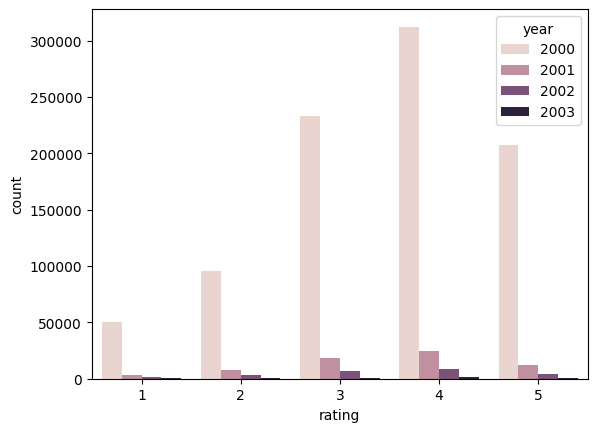

In [ ]:
# compute barplot stats for year and rating, add total counts
ax = sns.barplot(merge2.groupby("year")["rating"].value_counts().reset_index(),x="rating",y="count",hue="year")
# for i,p in enumerate(ax.patches):
# #   if i > 3:
#   print(p.get_height())
#     ax2.annotate(f'{int(p.get_height())}',  # Text to annotate (value of the bar)
#                 (p.get_x() + p.get_width() / 2, p.get_height()),  # Positioning of the text
#                 ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

In [ ]:
# df has multiindex, one is all counts, two is by user counts
# number of rates by rate and by user
rate_counts = merge2.groupby("year")["rating"].count().reset_index()
user_counts = merge2.groupby("year")["userid"].nunique().reset_index()
total_counts = pd.merge(merge2.groupby("year")["rating"].count().reset_index(),merge2.groupby("year")["userid"].nunique(),on="year")
total_counts["per_user"] = total_counts["rating"]/total_counts["userid"]
total_counts

,year,rating,userid,per_user
0,2000,898390,6034,148.887968
1,2001,66249,1065,62.205634
2,2002,23456,559,41.960644
3,2003,3274,178,18.393258


In [ ]:
merge2.groupby("userid")["rating"].count().describe()

,rating
count,6040.000000
mean,164.133940
std,191.262643
min,6.000000
25%,43.000000
50%,95.000000
75%,206.000000
max,2281.000000


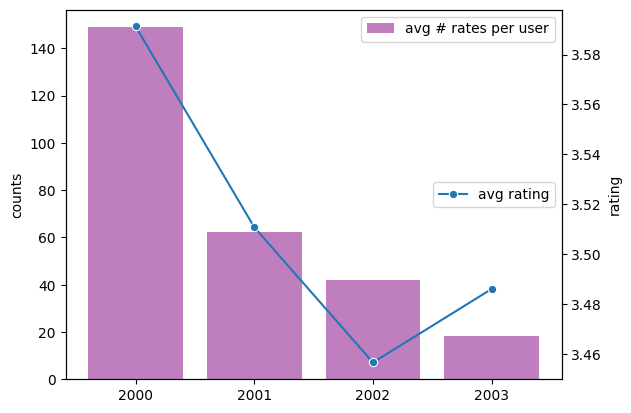

In [ ]:
# same line plot, 2 y axes, want to condense 3 plots in the same fig
# combine also average rating by year here.
fig, ax1 = plt.subplots()
ax1.set_xticks(range(2000, 2004, 1))
ax1.bar(total_counts["year"],total_counts["per_user"],label="avg # rates per user",color="purple",alpha=0.5)
ax1.set_ylabel("counts")
ax1.legend(loc="upper right")
ax2 = ax1.twinx()
sns.lineplot(x=avgs["year"],y=avgs["rating"],label="avg rating",ax=ax2,marker="o")
ax2.legend(loc="right");


Engagement per user was highest in 2000 then dropped exponentially to less than half in 2001, a trend that continued for the remaining years and applies across all dimensions of analysis. Assuming that
this is not purely an artifact of our imbalanced sample size, we need to investigate whether the persistent decrease is due to internal issues with our product or external forces in
the market including our competitors.

In overall, average ratings for all years stayed in the good range 3.4 to 3.6. Again, it seems that the reception was mot favorable in 2000 despite coming from a bigger audience compared to the subsequent years. The notable albeit minimal reversal of trend in 2003 could reflect two factors: better-quality movies coming out in the previous year or the changing taste of our users. Also, given that on average a user gave drastically fewer ratings for this year, this could be interpreted as some form of selection bias in the remaining pool - only those who found the movies good were willing to spend time rating them.

In [ ]:
# # fig, ax1 = plt.subplots(figsize=(6,6))
# sns.barplot(data=total_counts,x="year",y="rating",alpha=0.5)

# ax2 = sns.barplot(data=total_counts,x="year",y="userid",alpha=1,color="orange")
# for i,p in enumerate(ax2.patches):
#   if i > 3:
#   # print(p.get_height())
#     ax2.annotate(f'{int(p.get_height())}',  # Text to annotate (value of the bar)
#                 (p.get_x() + p.get_width() / 2, p.get_height()),  # Positioning of the text
#                 ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

In [ ]:
merge2[merge2["genres"].apply(lambda x: 'Comedy' in x)].groupby("year")["rating"].mean().values

array([3.53114546, 3.43354443, 3.36068702, 3.39754098])

In [ ]:
# dimension 1: genre, median rating by genre by year line plot
median_stats = {"year":np.arange(2000,2004)}
for gr in genres_df.columns[1:]:
  median_stats[gr] = median_stats.append(merge2[merge2["genres"].apply(lambda x: gr in x)].groupby("year")["rating"].mean().values)


(18,)

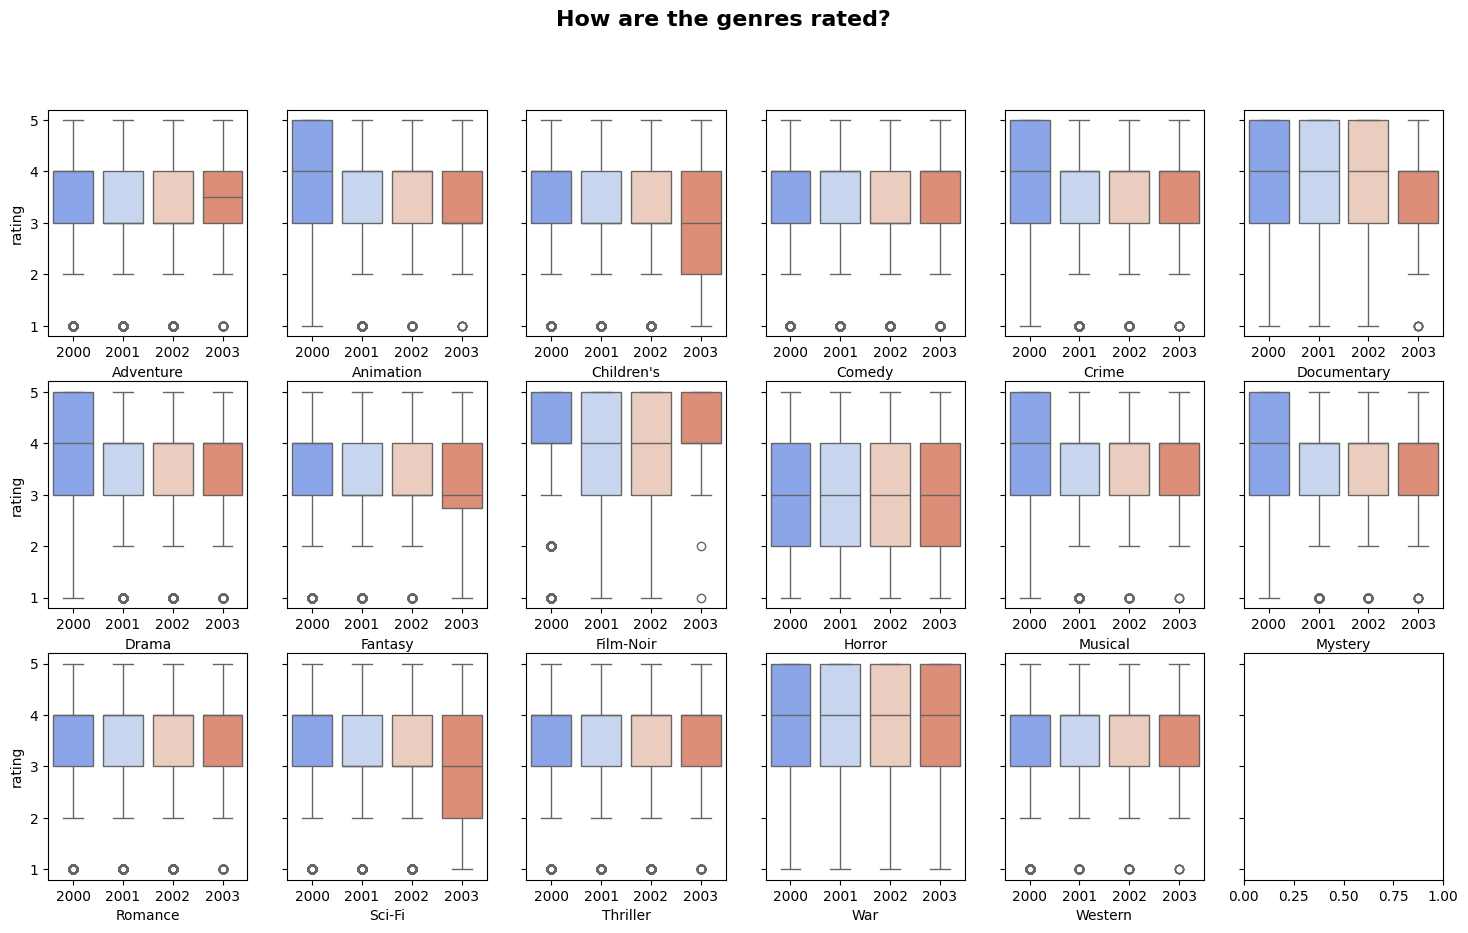

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=6,figsize=(18,10),sharey=True)
axes = axes.flatten()
for i,gr in enumerate(genres_df.columns[1:]):
  # print(gr)
  sns.boxplot(data=merge2[merge2["genres"].apply(lambda x: gr in x)],x="year",y="rating",ax=axes[i],palette="coolwarm",)
  axes[i].set_xlabel(gr)
fig.suptitle("How are the genres rated?", fontsize=16, fontweight='bold');

Regarding the distribution of ratings for 17 genres, we can easily group them into 3 subgroups: (name example titles in here)
  
  - Comedy, Romance, Thriller, Western, Adventure: these are very concentrated to the right side of the spectrum with most users rating 3-4. Very few people gave the movies in these genres a 1 throughout the four years. Oddly, the rating system for adventure in 2003 appears to allow for floating point number as well given that the median score for that year is 3.5.
  - Animation, Crime, Drama, Musical, Mystery, Children, Fantary, Scifi: this category is very similar to the previous one, only that the rating tendency shifted entirely for one single year among our sample time. First, animation, crime, drama, musical and mystery movies amassed pretty good reviews in 2000 with more than 75% of the users giving the top scores from 3-5.
  
  On the other hand, children's, fantasy and sci-fi did fine from 2000 to 2002 but suffered a dip in the last year, being rated 1-2 by over 25% of the users and even almost 50% in the case of fantasy (similar to adventure, the rating scale for fantasy seems inconsistent as well).
  - Horror, War, Documentary, Film-Noir: the distribution for the horror and war spread wider although war movies lean more heavily to the positive side having half of the raters give a score of 4 and above. On the other hand, they are also the two genres recording the highest ratio of 1-2 low ratings among their watchers.
  
  With the sole exception of 2003 when the ratings became more improved and much concentrated in the range 3-4, documentary bears close resemblance to war. The ratings for film-noir were the same just extremely good in the first and last year and half of its voting population gave a score of 4-5 throughout the entire four years.

In summary, we can say that the best-performing genre in terms of rating is film-noir and the worst is horror.

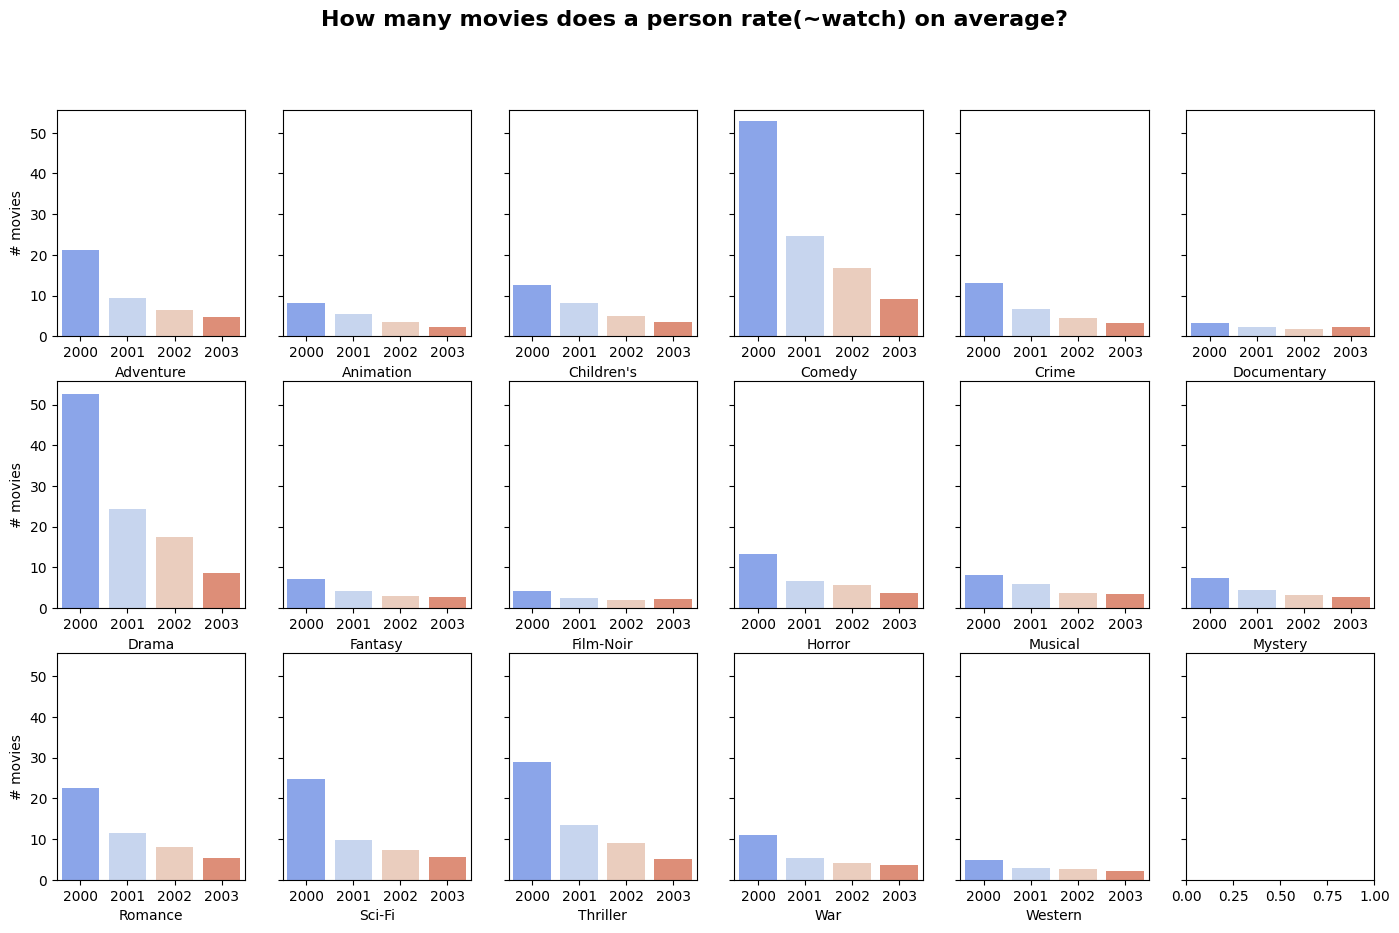

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=6,figsize=(17,10),sharey=True)
axes = axes.flatten()
for i,gr in enumerate(genres_df.columns[1:]):
  # print(gr)
  subdf = merge2[merge2["genres"].apply(lambda x: gr in x)].groupby("year")["userid"].count().reset_index()
  subdf["unique"] = merge2[merge2["genres"].apply(lambda x: gr in x)].groupby("year")["userid"].nunique().reset_index()["userid"]
  subdf["per_user"] = subdf["userid"]/subdf["unique"]
  sns.barplot(subdf,x="year",y="per_user",ax=axes[i],palette="coolwarm")
  # sns.boxplot(data=merge2[merge2["genres"].apply(lambda x: gr in x)].groupby("year"),x="year",y="rating",ax=axes[i],palette="coolwarm",)
  axes[i].set_xlabel(gr)
  axes[i].set_ylabel("# movies")
# plt.tight_layout()
fig.suptitle("How many movies does a person rate(~watch) on average?", fontsize=16, fontweight='bold');
# better title is how many people watch a movie on average?

**Wrong interpretation!**
Regarding the number of ratings/watches per user, the universal trend is a declining one from 2000 to 2003. Comedy and drama attracted the most votes for all four years at over 50 votes per user **(per movie is a better measure)** in absolute number, followed by thriller, scifi, romance and adventure. The least-rated movies are from film-noir, documentary and western. This limited exposure and hence possible lack of diversity in the audience pool might explain why film-noir recorded the best rating performance in our preceding analysis.  

In [ ]:
# top5 percent throughout the years belong to what genre - no need, the boxplot can tell
# dimension 2: user demographic info
users

,userid,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [ ]:
age_info = {'age':users["age"].unique(),'label':["Under 18","18-24","25-34","35-44","45-49","50-55","56+"]}
occupation_info = {'occupation':users["occupation"].sort_values().unique(),'label':["other","academic/educator","artist",
                                                                                    "clerical/admin","college/grad student",
                                                                                    "customer service","doctor/heathcare",
                                                                                    "executive/managerial","farmer","homemaker",
                                                                                    "K-12 student","lawyer","programmer","retired",
                                                                                    "sales/marketing","scientist","self-employed",
                                                                                    "technician/engineer","tradesman/craftsman","unemployed",
                                                                                    "writer"]}

In [ ]:
ages = {}
for a,l in zip(age_info["age"],age_info["label"]):
  ages[a] = l
merge2["age"] = merge2["age"].apply(lambda x: ages[x])

In [ ]:
# avg rating and age by occupation by year
holder = merge2.groupby(["year","age"])["rating"].mean().reset_index()
holder["std"] = merge2.groupby(["year","age"])["rating"].std().reset_index()["rating"]
holder["age"] = holder["age"].apply(lambda x: ages[x])

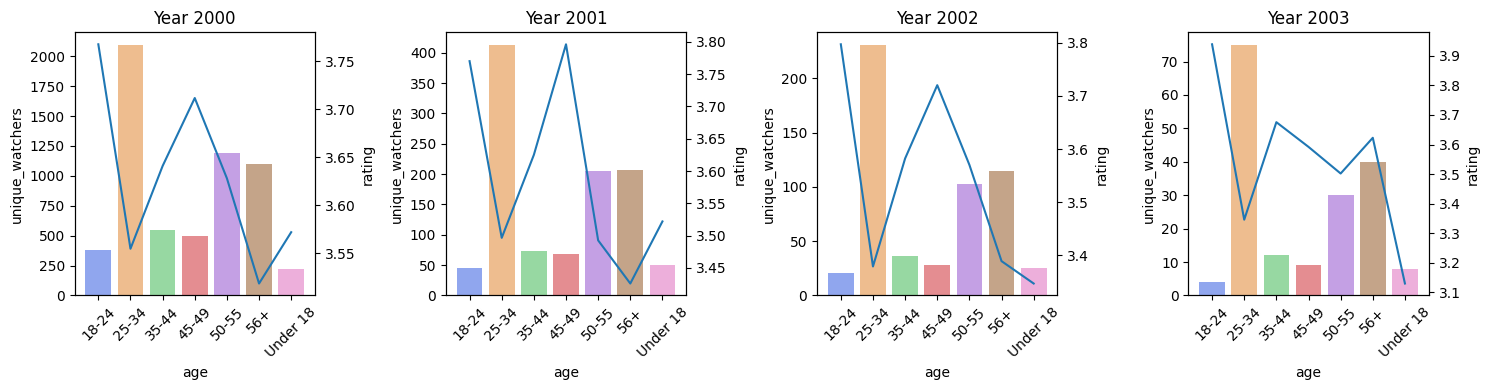

In [ ]:
fig, axes = plt.subplots(1,merge2["year"].nunique(),figsize=(15,4))
for i,ax in enumerate(axes):
  yr = merge2["year"].unique()[i]
  # 2 axes: one for average rating and one for number of unique watchers
  holder = merge2[merge2["year"]==yr].groupby("age")["rating"].mean().reset_index()
  holder["unique_watchers"] = merge2[merge2["year"]==yr].groupby("age")["userid"].nunique().reset_index()["userid"]
  sns.barplot(data=holder,x="age",y="unique_watchers",alpha=0.5,ax=ax,palette="bright")
  ax.set_title(f"Year {yr}")
  ax.set_xticklabels(holder["age"].values,rotation=45)
  subax = ax.twinx()
  sns.lineplot(holder,x="age",y="rating",ax=subax)
plt.tight_layout();


We can observe immediately that for all four years, the most actively rating groups in terms of the number of unique users are 25-34, 50-55 and older. Interesingly, young adults aged 25-34 consistently outnumbered other age groups by a large margin and were the most demanding in the ratings they gave. Their low average ratings were only surpassed by the 56+ group in the first two years and by the under 18 group in the last two years.

On the other side of the aisle, despite rating less actively, the 18-24 and 35-49 groups were simultaneously easier to please with a consistent rating of over 3.5 for all years and peaked at almost 3.8 in 2001.

In [ ]:
# create a stacked graph to see in percentage terms for age groups

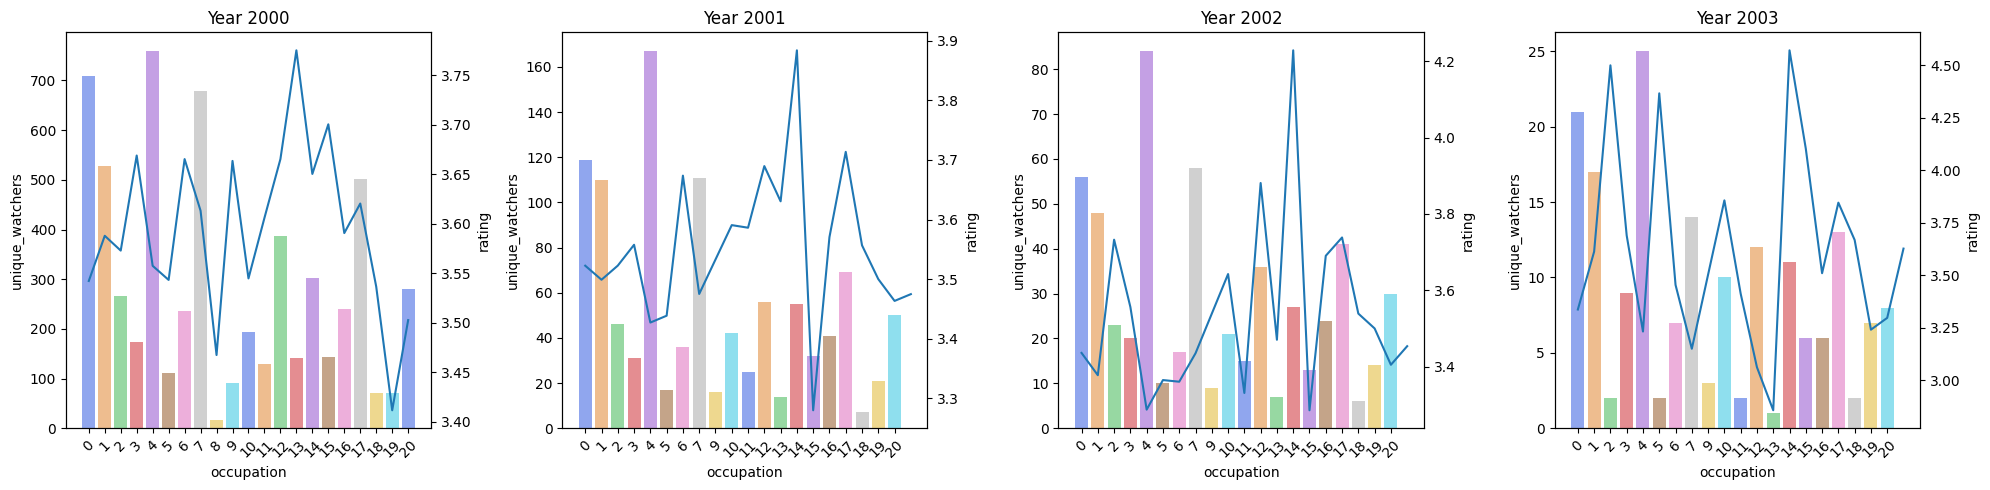

In [ ]:
fig, axes = plt.subplots(1,merge2["year"].nunique(),figsize=(20,5))
for i,ax in enumerate(axes):
  yr = merge2["year"].unique()[i]
  # 2 axes: one for averoccupation rating and one for number of unique watchers
  holder = merge2[merge2["year"]==yr].groupby("occupation")["rating"].mean().reset_index()
  holder["unique_watchers"] = merge2[merge2["year"]==yr].groupby("occupation")["userid"].nunique().reset_index()["userid"]
  sns.barplot(data=holder,x="occupation",y="unique_watchers",alpha=0.5,ax=ax,palette="bright")
  ax.set_title(f"Year {yr}")
  ax.set_xticklabels(holder["occupation"].values,rotation=45)
  subax = ax.twinx()
  sns.lineplot(holder,x="occupation",y="rating",ax=subax)
plt.tight_layout();
# no 8 in year 2001 to 2023
# sharey for rating scale

Occupation-wise, group 4 - college/graduate students dominate the user pool in terms of unique watchers across all years. They are followed by 0,1,7 which are other unspecified occupations, academic/educators and most intriguingly, executive/managerial (would have thought these people are too busy to enjoy themselves this much). So it looks like people currently in, or working in higher education really like watching movies. Apparently, technicians/engineers and programmers were avid cinephiles who gave quite generous ratings as well. An interesting point is that group 8 - farmers only existed in our 2000 sample, so we need to double check the classification method again to see whether they simply got merged into the unspecified group or something else more troubling happened. Finally, group 5, 13, 18 - customer service, retired and tradesman/craftsman recorded the smallest user pool at even fewer than 10 users each in 2002 and 2003.

Except for the first year, the highest ratings were always given by the sales/marketing group which reached up to more than 4.2 in average in 2002 and 2003. Scientists were the most nitpicky in 2001 and 2002, only followed by retirees in the last year who rated an average of less than 3 for all movies watched.

Lastly, despite being frequent movie-raters, the education group consisting of college/graduate students and academic/educators kind of mirrored each other in their ratings and never exceeded the mark of 3.55 across four years. This convergence of taste represents a huge opportunity because we could potentially kill two fat birds with one stone.

So given limited resources, we might want to invest in marketing towards the education, executive/managerial and technical people especially if their average spendings in our service are also high. Besides, if we can increase our reach within the sales/marketing group which already saw extremely positive reception of our selections, targeting them in the form of encouraging referrals to colleages/friends working in the same industry could be profitable.  

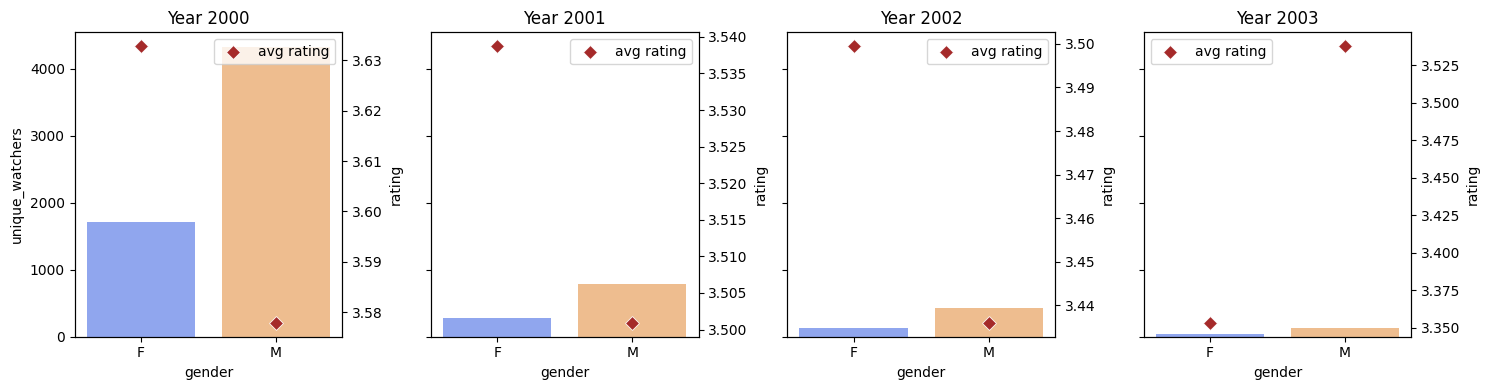

In [ ]:
fig, axes = plt.subplots(1,merge2["year"].nunique(),figsize=(15,4),sharey=True)
for i,ax in enumerate(axes):
  yr = merge2["year"].unique()[i]
  # 2 axes: one for avergender rating and one for number of unique watchers
  holder = merge2[merge2["year"]==yr].groupby("gender")["rating"].mean().reset_index()
  holder["unique_watchers"] = merge2[merge2["year"]==yr].groupby("gender")["userid"].nunique().reset_index()["userid"]
  sns.barplot(data=holder,x="gender",y="unique_watchers",alpha=0.5,ax=ax,palette="bright")
  ax.set_title(f"Year {yr}")
  # ax.set_xticklabels(holder["gender"].values,rotation=45)
  subax = ax.twinx()
  sns.scatterplot(holder,x="gender",y="rating",ax=subax,marker="D",color="brown",s=50,label="avg rating")

plt.tight_layout();

The number of unique male watchers is always more than double that of the opposite sex. With respect to the rating, 2000 saw the highest averages in both subpopulations with both surpassing 3.5. Following a trend of female ratings exceeding that of males, the peculiarity is in 2003 when the average rating from the former suddenly became much lower compared to the latter.

Examine why average rating in 2003 for the 2 genders switched.

Also, sharey for the rating scale => redraw.

In [ ]:
# !wget "https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip"
# !pip install zipcodes
!pip install pgeocode

In [ ]:
import pgeocode
nomi = pgeocode.Nominatim("US")
def get_state(zipcode):
  # print(zipcode)
  # nomi = pgeocode.Nominatim("US")
  state = nomi.query_postal_code(zipcode).loc["state_code"]
  if state:
    return state
  else:
    return f"state with code {zipcode} not found"
users["state"] = users["zipcode"].apply(get_state)

In [ ]:
users["zipcode"].apply(len).unique()

array([ 5, 10,  7,  6,  9])

In [ ]:
test = users[["zipcode","state"]]
test

,zipcode,state
0,48067,MI
1,70072,LA
2,55117,MN
3,02460,MA
4,55455,MN
...,...,...
6035,32603,FL
6036,76006,TX
6037,14706,NY
6038,01060,MA


In [ ]:
test[test["zipcode"].apply(lambda x: "-" in x)] # there are 151 unknown states, remove them for now
test = test[test["state"].notnull()]

In [ ]:
test.drop_duplicates(inplace=True)

In [ ]:
sum(test.duplicated())

0

In [ ]:
test["zipcode"] = test["zipcode"].astype(int)

In [ ]:
merge3 = merge2[merge2["zipcode"].apply(lambda x: "-" not in x)] # drop these 13k for now

In [ ]:
merge3["zipcode"] = merge3["zipcode"].astype(int)

In [ ]:
merge3 = pd.merge(test,merge3,on="zipcode",how="left")

In [ ]:
# average rating and average number of rates per user
geo_rating = merge3.groupby("state")["rating"].mean().reset_index()
geo_rating["count"] = merge3.groupby("state")["rating"].count().reset_index()["rating"]
geo_rating["unique_user"] = merge3.groupby("state")["userid"].nunique().reset_index()["userid"]
# geo_rating["per_user"] = geo_rating["count"]/geo_rating["unique_user"]
geo_rating["diversity"] = merge3.groupby("state")["rating"].std().reset_index()["rating"]

In [ ]:
geo_rating.head()

,state,rating,count,unique_user,diversity
0,AK,3.998881,894,9,0.992130
1,AL,3.684692,3495,23,1.052776
2,AR,3.506511,4454,28,1.097259
3,AZ,3.479746,14935,83,1.146016
4,CA,3.582044,178636,1091,1.106298


In [ ]:
import plotly.express as px
cols = ["rating","count","diversity"]
# fig, axes = plt.subplots(3,1)
# # fig.update_geos(scope="usa")
for i in range(3):
  ax = px.choropleth(geo_rating,locations="state",locationmode="USA-states",color=cols[i],hover_name="state",color_continuous_scale="Viridis")
  ax.update_geos(scope="usa")
  ax.show();

Location-wise, interesting observations are:
  
  - Missisipi did not only give out very positive rating but also their taste was pretty homogeneous state-wide.
  - California had the highest number of ratings, which makes sense considering that fact that it is home to Hollywood. Behind it were Texas, New York and Minesota.
  - Louisiana ranked in the bottom regarding rating counts but it was the most diverse when it comes to the ratings given.